In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# scipy submodules must be explicitly imported


NOTE: clustering algorithms, physical and mathematical constants, statistics and optimisation algorithms all present

## Special Functions
In 'special'

Include:
- Bessel functions
- Gamma functions
- Fresnel integrals
- Hypergeometric functions
- Orthogonal polynomials

<IPython.core.display.Javascript object>


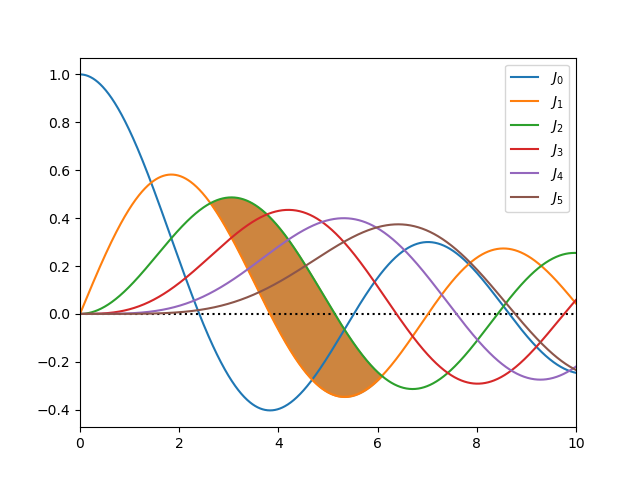

In [3]:
from scipy import special
x = np.arange(0, 10.001, 0.01)
for alpha in range(6):
    y = special.jv(alpha, x)
    plt.plot(x, y, label=r'$J_{}$'.format(alpha))
plt.hlines(0, 0, 10, linestyle=':')
plt.legend()

plt.xlim(0, 10)
plt.show()


In [4]:
# Root finding
from scipy.optimize import fsolve
from scipy.special import jv

# Define a function to solve
# First argument is variable (or array of variables) of interest

# finds where the first and second order Bessel functions cross
def f(z, a1, a2):
    return jv(a1, z) - jv(a2, z)

print(fsolve(f, 2.5, args=(1,2))) # give a starting estimate of 2.5
                                  # args are arguments of the function f
print(fsolve(f, 6, args=(1,2)))

# fill shape between the two curves
plt.fill_between(x, special.jv(1, x), special.jv(2, x), where = ((x > 2.630) & (x < 6.086)), color = 'peru')

[2.62987411]
[6.08635978]


In [5]:
# numerical integration

from scipy.integrate import quad # 1D integration
# Use previous function (first argument is variable of interest)
r = fsolve(f, (2.5, 6), args=(1, 2))
print(r)

quad(f, r[0], r[1], args=(1, 2))
# second value is the uncertainty on the integral

[2.62987411 6.08635978]


(-0.98961158607157, 1.0986895682924768e-14)

In [6]:
# can give limits at infinity
quad(np.exp, -np.inf, 0)

(1.0000000000000002, 5.842606742906004e-11)

In [7]:
# quad gives you nice error messages

print(quad(np.tan, 0, np.pi/2.0-0.0001))

print(quad(np.tan, 0, np.pi/2.0))

print(quad(np.tan, 0, np.pi/2.0+0.001))

(9.210340373641296, 2.0519127073728802e-09)
(38.58895946215512, 8.443496712555946)
(17.148123909630367, 0.004582854352300103)


<ipython-input-7-7d9ae2f71c3f>:5: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  print(quad(np.tan, 0, np.pi/2.0))
<ipython-input-7-7d9ae2f71c3f>:7: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  print(quad(np.tan, 0, np.pi/2.0+0.001))


## Statistics

### Probability distriubtions
Including: norm, chi2, expon, poisson, binom, boltzmann,...
Methods include:
- rvs: returns array of random variates
- pdf: probability density function
- cdf: cumulative density function
- ppf: percent point function

Statistical functions, including
- mean, median, skew, kurtosis
- normaltest, probplot
- pearsonr, spearmanr, wilcoxon

In [8]:
import scipy.stats as stats

lamda = 10
p = stats.poisson(lamda)

# P (n > 20)
print(1 - p.cdf(20))

# N: P(n < N) = 0.05, 0.95
# only get integer values since Poisson distn. is discrete
print(p.ppf((0.05, 0.95)))

# true 95% CI bounds on lamda
print(stats.gamma.ppf((0.025, 0.975), lamda+0.5, 1))

q = stats.poisson(1)
print(q.ppf((0.05, 0.95)))


0.0015882606618580208
[ 5. 15.]
[ 6.14144889 18.73943795]
[0. 3.]


<IPython.core.display.Javascript object>


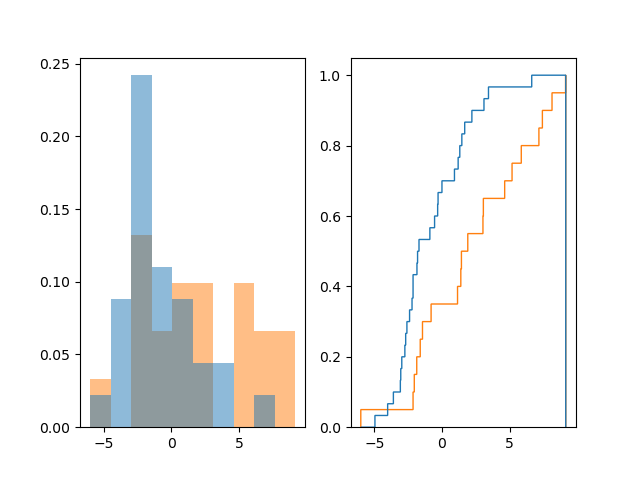

In [9]:
x = stats.norm.rvs(-1, 3, size=30) # specify pdf parameters
n = stats.norm(1, 3) # create 'frozen' pdf
y = n.rvs(20) # 20 random variates
z = n.rvs(50) # 50 random variates
"""seems deprecated
p = plt.subplot(121) # 1 row, 2 cols, first set of axes
plt.hist((x, y), density=True, histtype='stepfilled', alpha=0.5)


p = plt.subplot(122) # 1 row, 2 cols, second set of axes
h = plt.hist((x, y), histtype='step', cumulative=True, density=True,
bins=1000)
"""
plt.figure()
# keep a reference to the first axis
ax1 = plt.subplot(1,2,1)
ax1.hist((x, y), density=True, histtype='stepfilled', alpha=0.5)

# and a reference to the second axis
ax2 = plt.subplot(1,2,2)
ax2.hist((x, y), density=True, histtype='step', cumulative=True,
         bins=1000)

plt.show()

In [10]:
print(stats.ks_2samp(x, y)) # compare 2 sets of data
print(stats.ttest_ind(x, y))

print(stats.ks_2samp(x, z))
print(stats.ttest_ind(x, z))

print(stats.kstest(x, stats.norm(1,3).cdf)) # compare 1 set of data
# with the cdf, rather than 2 different data sets

KstestResult(statistic=0.4, pvalue=0.03452032044186115)
Ttest_indResult(statistic=-3.145672830839508, pvalue=0.0028437641279355874)
KstestResult(statistic=0.31333333333333335, pvalue=0.040914237532632236)
Ttest_indResult(statistic=-1.5472936608482675, pvalue=0.12584043859047334)
KstestResult(statistic=0.34774390871150124, pvalue=0.0009555220598693737)
